In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# functions used in notebook 
def save_obj(obj, name, file_path):
    """
    This function saves any object as a .pkl file so that it can be easily read in other notebooks
    
    Parameters
    -----
    obj : Object's variable name 
        The object that needs to be saved.
    name : String
        The name that you would like to save the object as.
    file_path: String
        Directory in which you are saving the object to.
    
    Returns
    -----
        A saved .pkl file in dir and name specified.
    """
    file_path = os.path.join(file_path, name)
    with open(file_path + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name, file_path):
    """
    This function loads any .pkl file
    
    Parameters
    -----
    name : String
        The name of the file that needs to be loaded.
    file_path: String
        Directory in which you are loading the object from.
    
    Returns
    -----
        An object that was saved as a .pkl file in dir and name specified.
    """
    file_path = os.path.join(file_path, name)
    with open(file_path + '.pkl', 'rb') as f:
        return pickle.load(f)

## Loading CS data and Suspension alert data 

In [3]:
cs_summary= load_obj('cs_maincols','C:\\Users\\Sarah Rana\\OneDrive - Grant Thornton UK\\Citi (092022)\\Python Scripts')

In [4]:
suspensions= load_obj('suspensions','C:\\Users\\Sarah Rana\\OneDrive - Grant Thornton UK\\Citi (092022)\\Python Scripts')

In [5]:
suspensions.shape

(241, 14)

# All the suspension alerts

In [6]:
suspensions.msg.value_counts()

Suspending the order. Reason: MsgRateMonitor : Order breached maximum message send rate [50 msgs] per time interval [1 s], please ensure it is working as expected or increase the maximum breach rate.                                                                                                                                226
Suspending the order. Reason: Risk check violation: Significant Price Move.\nPrice moved 16% against the order since Arrival.\nPrice moved 16% against the order.\nCurrent Mid=234.9\nReference Price=280.90\nArrival Price=280.90\nDetails: LowerBound=238.76; Bid Px=220.00; Ask Px=249.80; RefPrice=280.90\nTraderID: TP00            1
Suspending the order. Reason: Risk check violation: Significant Price Move.\nPrice moved 15% against the order since Arrival.\nPrice moved 15% against the order.\nCurrent Mid=390.3\nReference Price=460.25\nArrival Price=460.25\nDetails: LowerBound=391.21; Bid Px=350.00; Ask Px=430.60; RefPrice=460.25\nTraderID: TP00            1
Suspend

In [7]:
# cheking the max aggressive order alert
suspensions.loc[suspensions.msg == 'Suspending the order. Reason: Exceeds max aggressive qty(116324521 > 1.15941153E8)']

,date,id,time,orderid,server,refid,level,category,channel,clientID,actstatus,msg,country,suspentime
6,2022-05-02,27364806,1970-01-01 09:08:58.568,22122EN0000u,TE21-prod,MT.AS 38647051 SELL VWAP P,2,Suspend,PRINPRGM,ZED,1,Suspending the order. Reason: Exceeds max aggr...,AS,2022-05-02 09:08:58.336


In [8]:
# checking is Message rate alerts were all for different parentOrderIDS
suspensions.loc[suspensions.msg == 'Suspending the order. Reason: MsgRateMonitor : Order breached maximum message send rate [50 msgs] per time interval [1 s], please ensure it is working as expected or increase the maximum breach rate.'].orderid.nunique()

226

all message rate suspensions are for unique parentOrderIDS

In [9]:
# Taking the main columns from cs data to use in algo
cs_id_msgtime=cs_summary[['sym','orderid','parentOrderID','createTime','orderQty','msgSendTime']].copy()

# 50 consecutive orders of same size (within 60 sec)

In [10]:
# Order CS data by parentOrderID then createTime 
cs_id_msgtime.sort_values(by=['parentOrderID','createTime'],inplace=True)

In [11]:
cs_id_msgtime.tail(20)

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime
228984,CAGR.PA,22122EN018nb,22122EN00022,2022-05-02 09:10:27.369,2454,2022-05-02 09:10:28.047
228985,CAGR.PA,22122EN018nc,22122EN00022,2022-05-02 09:10:27.994,464040,2022-05-02 09:10:28.008
228986,CAGR.PA,22122EN018nd,22122EN00022,2022-05-02 09:10:28.013,20249,2022-05-02 09:10:28.030
229173,CAGR.PA,22122EN018ng,22122EN00022,2022-05-02 09:10:28.127,2454,2022-05-02 09:10:28.997
229175,CAGR.PA,22122EN018nk,22122EN00022,2022-05-02 09:10:28.970,8884,2022-05-02 09:10:28.982
229351,CAGR.PA,22122EN018nl,22122EN00022,2022-05-02 09:10:29.169,2454,2022-05-02 09:10:29.778
229360,CAGR.PA,22122EN018nv,22122EN00022,2022-05-02 09:10:29.751,269,2022-05-02 09:10:29.762
229361,CAGR.PA,22122EN018nw,22122EN00022,2022-05-02 09:10:29.970,2454,2022-05-02 09:10:30.610
229375,CAGR.PA,22122EN018nx,22122EN00022,2022-05-02 09:10:30.570,440192,2022-05-02 09:10:30.591
229376,CAGR.PA,22122EN018ny,22122EN00022,2022-05-02 09:10:30.769,2454,2022-05-02 09:10:31.397


In [12]:
cs_id_msgtime.reset_index(drop=True,inplace=True)

In [13]:
#create new column that shifts orderQty column down
cs_id_msgtime['previous_orderQty']=cs_id_msgtime['orderQty'].shift(+1)

In [14]:
for i in range(1,len(cs_id_msgtime)):
    #replace previous share size with NaN, if comparing from two different parentOrderIDS
    if cs_id_msgtime.loc[i,'parentOrderID'] != cs_id_msgtime.loc[i-1,'parentOrderID']:
        cs_id_msgtime.loc[i,'previous_orderQty'] = float('NaN')

In [15]:
# checking how many NaN were placed
cs_id_msgtime.loc[cs_id_msgtime.previous_orderQty.isnull()]

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime,previous_orderQty
0,SRENH.S,22122E3001b0,22122E3000f8,2022-05-02 08:57:14.725,2530,2022-05-02 08:57:20.948,NaN
1093,STMN.S,22122E3000wo,22122E3000f9,2022-05-02 08:57:10.727,129,2022-05-02 08:57:14.830,NaN
1488,TENR.MI,22122E30014m,22122E3000fa,2022-05-02 08:57:12.728,404,2022-05-02 08:57:20.886,NaN
3172,CVO.PA,22122E3000xd,22122E3000fb,2022-05-02 08:57:10.844,57,2022-05-02 08:57:18.221,NaN
4014,ASSAb.ST,22122E3000pe,22122E3000fc,2022-05-02 08:57:08.873,1091,2022-05-02 08:57:39.115,NaN
...,...,...,...,...,...,...,...
225112,CBKG.DE,22122EN001bv,22122EN0001y,2022-05-02 08:57:18.869,20580,2022-05-02 08:57:22.474,NaN
225544,ELI.BR,22122EN001br,22122EN0001z,2022-05-02 08:57:18.857,188,2022-05-02 08:57:40.144,NaN
225765,CARLb.CO,22122EN000b3,22122EN00020,2022-05-02 08:57:11.877,664,2022-05-02 08:57:15.996,NaN
226242,ELE.MC,22122EN0007j,22122EN00021,2022-05-02 08:57:10.914,642,2022-05-02 08:57:21.661,NaN


There are 284 NaN values. This is expected as there are 284 unique paentOrderIDs.

In [16]:
%%time 
for i in range(1,len(cs_id_msgtime)):
    if cs_id_msgtime.loc[i,'orderQty'] == cs_id_msgtime.loc[i,'previous_orderQty']: #compare share size to pervious share size 
        cs_id_msgtime.loc[i,'consec_count'] = cs_id_msgtime.loc[i-1,'consec_count'] +1 #create new column that records an increase in count if consecutive shares are the same size
    else:
        cs_id_msgtime.loc[i,'consec_count'] = 1 #default count =1 

CPU times: total: 19.6 s
Wall time: 19.6 s


<AxesSubplot:xlabel='createTime'>

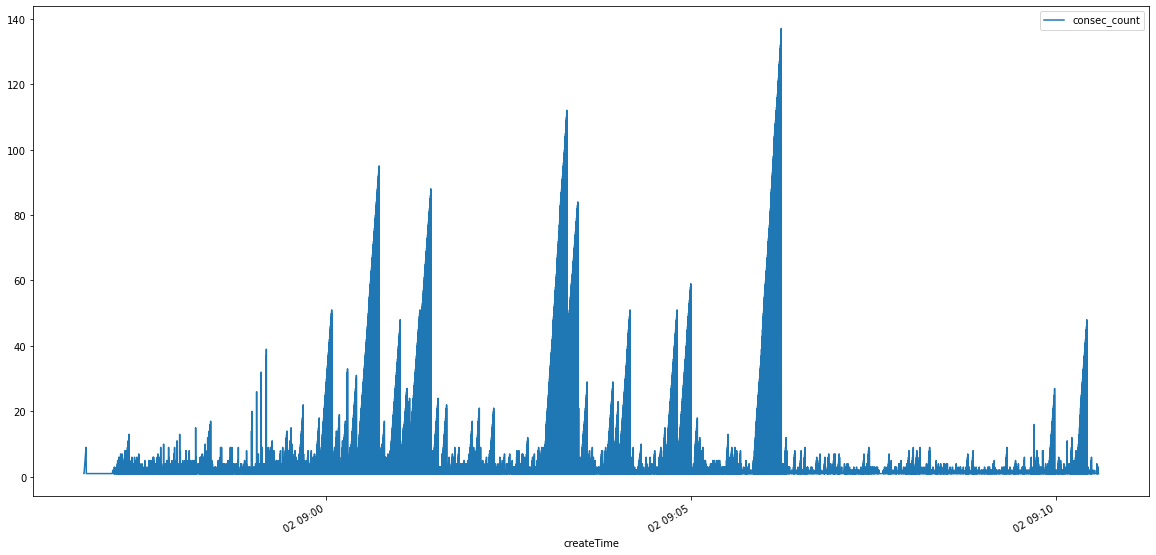

In [17]:
#plot
cs_id_msgtime.plot(x='createTime', y='consec_count', kind='line')

Plot shows the consecutive count of shares of the same size across time. There are many occurances where the threshold (50) is surpassed.

In [18]:
cs_id_msgtime.query('consec_count == 50 ') # orders that reached 50 consecutive shares of same size

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime,previous_orderQty,consec_count
37620,SOF.BR,22122E700dj8,22122E700066,2022-05-02 09:01:17.260,9,2022-05-02 09:01:17.265,9.0,50.0
89626,VACN.S,22122EE00bhd,22122EE0013i,2022-05-02 09:00:04.765,262,2022-05-02 09:00:04.771,262.0,50.0
101985,LISP.S,22122EE00kcv,22122EE00142,2022-05-02 09:04:48.595,6,2022-05-02 09:04:48.603,6.0,50.0
121183,TEMN.S,22122EI00zht,22122EI000t2,2022-05-02 09:03:07.487,1053,2022-05-02 09:03:07.493,1053.0,50.0
127439,WLSNc.AS,22122EI00o40,22122EI000t8,2022-05-02 09:00:35.172,47785,2022-05-02 09:00:35.178,47785.0,50.0
127716,WLSNc.AS,22122EI00rg6,22122EI000t8,2022-05-02 09:01:18.972,65780,2022-05-02 09:01:18.978,65780.0,50.0
136166,LUNE.ST,22122EI00zzs,22122EI000ti,2022-05-02 09:03:20.157,42349,2022-05-02 09:03:20.163,42349.0,50.0
144123,SGSN.S,22122EI013rl,22122EI000tq,2022-05-02 09:04:58.189,3134,2022-05-02 09:04:58.198,3134.0,50.0
186860,SCHN.S,22122EN00xhx,22122EN0000h,2022-05-02 09:04:09.880,510,2022-05-02 09:04:09.898,510.0,50.0
190273,SOON.S,22122EN011qv,22122EN0000l,2022-05-02 09:05:59.724,31528,2022-05-02 09:05:59.729,31528.0,50.0


Suspension data show that 6 alerts were raised for 50 consecutive orders of the same size. These inlcude:
- **22122EN00018 (size 2)** ? - max count reached 39
- **22122EE0013i (size 262)** : 8:59:55.166 - 9:00:04.765
- **22122E700066 (size 9)** : 09:01:07.061 - 09:01:17.260
- **22122EN0001x (size 138)** : 09:01:13.533 - 09:01:23.139	
- **22122EN0000h (size 510)** : 09:04:00.481 - 09:04:09.880
- **22122EE00142 (size 6)** : 09:04:38.995 - 09:04:48.595

The query above confirms 5/6 of these alerts and includes 6 more

- **22122EI000t2 (size 1053)** : 09:02:58.686 - 09:03:07.487 (consec count reaches 112)
- **22122EI000t8 (size 47785)** : 09:00:25.372 - 09:00:35.172 (consec count reaches 95) - though suspended due to msgratemonitor
- **22122EI000t8 (size 65780)** : 09:01:09.372 - 09:01:18.972 (consec count reaches 88) - ^^^
- **22122EI000ti (size 42349)** : 09:03:10.758 - 09:03:20.157 (consec count reaches 84)- though suspended due to msgratemonitor
- **22122EI000tq (size 3134)** : 09:04:48.790 - 09:04:58.189 (consec count reaches 59)- though suspended due to msgratemonitor
- **22122EN0000l (size 31528)** : 09:05:51.354 - 09:05:59.724 (consec count reaches 137)

In [19]:
# checking why 22122EN00018 was not caught
with pd.option_context("display.max_rows", None):
    display(cs_id_msgtime.loc[cs_id_msgtime.parentOrderID == '22122EN00018'])

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime,previous_orderQty,consec_count
205266,LISN.S,22122EN000ny,22122EN00018,2022-05-02 08:57:14.571,3,2022-05-02 08:58:54.900,NaN,1.0
205267,LISN.S,22122EN000o5,22122EN00018,2022-05-02 08:57:14.585,3,2022-05-02 08:57:14.595,3.0,2.0
205268,LISN.S,22122EN000o7,22122EN00018,2022-05-02 08:57:14.678,2,2022-05-02 08:57:14.689,3.0,1.0
205269,LISN.S,22122EN000ox,22122EN00018,2022-05-02 08:57:14.877,3,2022-05-02 08:57:14.895,2.0,1.0
205270,LISN.S,22122EN000pq,22122EN00018,2022-05-02 08:57:15.078,2,2022-05-02 08:57:15.131,3.0,1.0
205271,LISN.S,22122EN000qz,22122EN00018,2022-05-02 08:57:15.278,3,2022-05-02 08:57:15.298,2.0,1.0
205272,LISN.S,22122EN000si,22122EN00018,2022-05-02 08:57:15.514,3,2022-05-02 08:57:15.572,3.0,2.0
205273,LISN.S,22122EN000ua,22122EN00018,2022-05-02 08:57:15.678,2,2022-05-02 08:57:16.125,3.0,1.0
205274,LISN.S,22122EN000yh,22122EN00018,2022-05-02 08:57:16.279,2,2022-05-02 08:57:16.287,2.0,2.0
205275,LISN.S,22122EN000zd,22122EN00018,2022-05-02 08:57:16.478,2,2022-05-02 08:57:21.191,2.0,3.0


In [20]:
suspensions.loc[suspensions.orderid == '22122EI000t8']

,date,id,time,orderid,server,refid,level,category,channel,clientID,actstatus,msg,country,suspentime
88,2022-05-02,24118629,1970-01-01 09:02:46.646,22122EI000t8,TE18-prod,WLSNc.AS 15881429 SELL VWAP P,2,Suspend,PRINPRGM,ZED,1,Suspending the order. Reason: MsgRateMonitor :...,AS,2022-05-02 09:02:46.589


In [21]:
suspensions.loc[suspensions.orderid == '22122EI000ti']

,date,id,time,orderid,server,refid,level,category,channel,clientID,actstatus,msg,country,suspentime
171,2022-05-02,25922123,1970-01-01 09:05:40.372,22122EI000ti,TE18-prod,LUNE.ST 12108298 SELL VWAP P,2,Suspend,PRINPRGM,ZED,1,Suspending the order. Reason: MsgRateMonitor :...,SE,2022-05-02 09:05:40.261


In [22]:
suspensions.loc[suspensions.orderid == '22122EI000tq']

,date,id,time,orderid,server,refid,level,category,channel,clientID,actstatus,msg,country,suspentime
223,2022-05-02,28044430,1970-01-01 09:10:29.517,22122EI000tq,TE18-prod,SGSN.S 362741 SELL VWAP P,2,Suspend,PRINPRGM,ZED,1,Suspending the order. Reason: MsgRateMonitor :...,VX,2022-05-02 09:10:29.202


In [23]:
cs_id_msgtime.to_csv('consecutive_orders_algo.csv')

### alternative (with msgSendTime) ----------> IGNORE (SKIP TO 50 messages / sec)

#### redoing the algo test with different column to check results 

In [24]:
cs_id_msgtime2=cs_summary[['sym','orderid','parentOrderID','createTime','orderQty','msgSendTime']].copy()

In [25]:
cs_id_msgtime2.sort_values(by=['parentOrderID','msgSendTime'],inplace=True)

In [26]:
cs_id_msgtime2.reset_index(drop=True,inplace=True)

In [27]:
cs_id_msgtime2['previous_orderQty']=cs_id_msgtime2['orderQty'].shift(+1)

In [28]:
for i in range(1,len(cs_id_msgtime2)):
    if cs_id_msgtime2.loc[i,'parentOrderID'] != cs_id_msgtime2.loc[i-1,'parentOrderID']:
        cs_id_msgtime2.loc[i,'previous_orderQty'] = float('NaN')

In [29]:
for i in range(1,len(cs_id_msgtime2)):
    if cs_id_msgtime2.loc[i,'orderQty'] == cs_id_msgtime2.loc[i,'previous_orderQty']: 
        cs_id_msgtime2.loc[i,'consec_count'] = cs_id_msgtime2.loc[i-1,'consec_count'] +1 
    else:
        cs_id_msgtime2.loc[i,'consec_count'] = 1

In [30]:
cs_id_msgtime2.head(25)

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime,previous_orderQty,consec_count
0,SRENH.S,22122E3001b7,22122E3000f8,2022-05-02 08:57:14.730,15873,2022-05-02 08:57:14.740,NaN,NaN
1,SRENH.S,22122E3001b8,22122E3000f8,2022-05-02 08:57:14.743,17172,2022-05-02 08:57:14.754,15873.0,1.0
2,SRENH.S,22122E3001b9,22122E3000f8,2022-05-02 08:57:14.800,14932,2022-05-02 08:57:14.819,17172.0,1.0
3,SRENH.S,22122E3001c0,22122E3000f8,2022-05-02 08:57:14.970,15200,2022-05-02 08:57:15.015,14932.0,1.0
4,SRENH.S,22122E3001cr,22122E3000f8,2022-05-02 08:57:15.030,15123,2022-05-02 08:57:15.065,15200.0,1.0
5,SRENH.S,22122E3001da,22122E3000f8,2022-05-02 08:57:15.205,14284,2022-05-02 08:57:15.378,15123.0,1.0
6,SRENH.S,22122E3001dx,22122E3000f8,2022-05-02 08:57:15.400,14515,2022-05-02 08:57:15.411,14284.0,1.0
7,SRENH.S,22122E3001e0,22122E3000f8,2022-05-02 08:57:15.429,14342,2022-05-02 08:57:15.436,14515.0,1.0
8,SRENH.S,22122E3001b4,22122E3000f8,2022-05-02 08:57:14.727,545,2022-05-02 08:57:17.790,14342.0,1.0
9,SRENH.S,22122E3001b6,22122E3000f8,2022-05-02 08:57:14.728,232,2022-05-02 08:57:17.792,545.0,1.0


In [31]:
cs_id_msgtime2.query('consec_count.isnull() ')

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime,previous_orderQty,consec_count
0,SRENH.S,22122E3001b7,22122E3000f8,2022-05-02 08:57:14.730,15873,2022-05-02 08:57:14.740,NaN,NaN


In [32]:
cs_id_msgtime2.query('consec_count ==50 ')

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime,previous_orderQty,consec_count
37611,SOF.BR,22122E700dis,22122E700066,2022-05-02 09:01:17.060,9,2022-05-02 09:01:17.065,9.0,50.0
89624,VACN.S,22122EE00bha,22122EE0013i,2022-05-02 09:00:04.566,262,2022-05-02 09:00:04.572,262.0,50.0
101974,LISP.S,22122EE00kc7,22122EE00142,2022-05-02 09:04:48.195,6,2022-05-02 09:04:48.203,6.0,50.0
121182,TEMN.S,22122EI00zht,22122EI000t2,2022-05-02 09:03:07.487,1053,2022-05-02 09:03:07.493,1053.0,50.0
127433,WLSNc.AS,22122EI00o40,22122EI000t8,2022-05-02 09:00:35.172,47785,2022-05-02 09:00:35.178,47785.0,50.0
127710,WLSNc.AS,22122EI00rg6,22122EI000t8,2022-05-02 09:01:18.972,65780,2022-05-02 09:01:18.978,65780.0,50.0
136164,LUNE.ST,22122EI00zzs,22122EI000ti,2022-05-02 09:03:20.157,42349,2022-05-02 09:03:20.163,42349.0,50.0
144114,SGSN.S,22122EI013rg,22122EI000tq,2022-05-02 09:04:57.990,3134,2022-05-02 09:04:57.995,3134.0,50.0
186855,SCHN.S,22122EN00xhx,22122EN0000h,2022-05-02 09:04:09.880,510,2022-05-02 09:04:09.898,510.0,50.0
190267,SOON.S,22122EN011qf,22122EN0000l,2022-05-02 09:05:59.523,31528,2022-05-02 09:05:59.528,31528.0,50.0


In [33]:
with pd.option_context("display.max_rows", None):
    display(cs_id_msgtime.loc[cs_id_msgtime.parentOrderID == '22122EN0001x'])

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime,previous_orderQty,consec_count
224792,EMSN.S,22122EN000oq,22122EN0001x,2022-05-02 08:57:14.855,9,2022-05-02 08:57:23.793,NaN,1.0
224793,EMSN.S,22122EN000os,22122EN0001x,2022-05-02 08:57:14.857,11,2022-05-02 08:57:23.799,9.0,1.0
224794,EMSN.S,22122EN000ot,22122EN0001x,2022-05-02 08:57:14.859,5,2022-05-02 08:57:23.794,11.0,1.0
224795,EMSN.S,22122EN000ou,22122EN0001x,2022-05-02 08:57:14.860,209,2022-05-02 08:57:14.871,5.0,1.0
224796,EMSN.S,22122EN000oz,22122EN0001x,2022-05-02 08:57:14.887,191,2022-05-02 08:57:14.900,209.0,1.0
224797,EMSN.S,22122EN000pe,22122EN0001x,2022-05-02 08:57:15.019,189,2022-05-02 08:57:15.053,191.0,1.0
224798,EMSN.S,22122EN000q2,22122EN0001x,2022-05-02 08:57:15.137,177,2022-05-02 08:57:15.186,189.0,1.0
224799,EMSN.S,22122EN000re,22122EN0001x,2022-05-02 08:57:15.334,176,2022-05-02 08:57:15.368,177.0,1.0
224800,EMSN.S,22122EN000sw,22122EN0001x,2022-05-02 08:57:15.545,177,2022-05-02 08:57:15.595,176.0,1.0
224801,EMSN.S,22122EN000uo,22122EN0001x,2022-05-02 08:57:15.734,176,2022-05-02 08:57:15.777,177.0,1.0


### alternative (with time)

#### redoing the algo test with different column to check results 

In [34]:
%%time
df=pd.read_csv('C:\\Users\\Sarah Rana\\OneDrive - Grant Thornton UK\\Citi (092022)\\Project Dataset\\allChildPTEZED.csv', low_memory=False)

CPU times: total: 7.33 s
Wall time: 7.45 s


In [35]:
cs_time=df[['sym','orderid','parentOrderID','time','orderQty']].copy()

In [36]:
cs_time.sort_values(by=['parentOrderID','time'],inplace=True)

In [37]:
cs_time.reset_index(drop=True,inplace=True)

In [38]:
cs_time['previous_orderQty']=cs_time['orderQty'].shift(+1)

In [39]:
for i in range(1,len(cs_time)):
    if cs_time.loc[i,'parentOrderID'] != cs_time.loc[i-1,'parentOrderID']:
        cs_time.loc[i,'previous_orderQty'] = float('NaN')

In [40]:
for i in range(1,len(cs_time)):
    if cs_time.loc[i,'orderQty'] == cs_time.loc[i,'previous_orderQty']: 
        cs_time.loc[i,'consec_count'] = cs_time.loc[i-1,'consec_count'] +1 
    else:
        cs_time.loc[i,'consec_count'] = 1

In [41]:
cs_time.query('consec_count ==50 ')

,sym,orderid,parentOrderID,time,orderQty,previous_orderQty,consec_count
37611,SOF.BR,22122E700dis,22122E700066,09:01:17.066,9,9.0,50.0
89624,VACN.S,22122EE00bha,22122EE0013i,09:00:04.573,262,262.0,50.0
101974,LISP.S,22122EE00kc7,22122EE00142,09:04:48.204,6,6.0,50.0
121182,TEMN.S,22122EI00zht,22122EI000t2,09:03:07.495,1053,1053.0,50.0
127433,WLSNc.AS,22122EI00o40,22122EI000t8,09:00:35.179,47785,47785.0,50.0
127710,WLSNc.AS,22122EI00rg6,22122EI000t8,09:01:18.981,65780,65780.0,50.0
136164,LUNE.ST,22122EI00zzs,22122EI000ti,09:03:20.165,42349,42349.0,50.0
144114,SGSN.S,22122EI013rg,22122EI000tq,09:04:57.997,3134,3134.0,50.0
186855,SCHN.S,22122EN00xhx,22122EN0000h,09:04:09.899,510,510.0,50.0
190267,SOON.S,22122EN011qf,22122EN0000l,09:05:59.530,31528,31528.0,50.0


### alternative (no ordering by parentOrderID)

In [42]:
cs_id_msgtime1=cs_summary[['sym','orderid','parentOrderID','createTime','orderQty','msgSendTime']].copy()

In [43]:
cs_id_msgtime1.sort_values(by='createTime',inplace=True)

In [44]:
cs_id_msgtime1.reset_index(drop=True,inplace=True)

In [45]:
cs_id_msgtime1['previous_orderQty']=cs_id_msgtime1['orderQty'].shift(+1)

In [46]:
for i in range(1,len(cs_id_msgtime1)):
    if cs_id_msgtime1.loc[i,'parentOrderID'] != cs_id_msgtime1.loc[i-1,'parentOrderID']:
        cs_id_msgtime1.loc[i,'previous_orderQty'] = float('NaN')

In [47]:
for i in range(1,len(cs_id_msgtime1)):
    if cs_id_msgtime1.loc[i,'orderQty'] == cs_id_msgtime1.loc[i,'previous_orderQty']: 
        cs_id_msgtime1.loc[i,'consec_count'] = cs_id_msgtime1.loc[i-1,'consec_count'] +1 
    else:
        cs_id_msgtime1.loc[i,'consec_count'] = 1

In [48]:
cs_id_msgtime1.query('consec_count ==50 ')

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime,previous_orderQty,consec_count


In [49]:
cs_id_msgtime1.head(25)

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime,previous_orderQty,consec_count
0,ESSITYb.ST,22122E70006p,22122E70006l,2022-05-02 08:56:41.511,360,2022-05-02 08:57:02.378,NaN,NaN
1,ESSITYb.ST,22122E70006q,22122E70006l,2022-05-02 08:56:41.516,250,2022-05-02 08:57:02.381,360.0,1.0
2,ESSITYb.ST,22122E70006r,22122E70006l,2022-05-02 08:56:41.520,1183,2022-05-02 08:56:41.542,250.0,1.0
3,ESSITYb.ST,22122E70006s,22122E70006l,2022-05-02 08:56:41.735,1183,2022-05-02 08:56:41.744,1183.0,2.0
4,ESSITYb.ST,22122E70006t,22122E70006l,2022-05-02 08:56:41.936,1183,2022-05-02 08:56:41.991,1183.0,3.0
5,ESSITYb.ST,22122E70006u,22122E70006l,2022-05-02 08:56:42.135,1183,2022-05-02 08:56:42.142,1183.0,4.0
6,ESSITYb.ST,22122E70006v,22122E70006l,2022-05-02 08:56:42.335,1183,2022-05-02 08:56:42.387,1183.0,5.0
7,ESSITYb.ST,22122E70006w,22122E70006l,2022-05-02 08:56:42.536,1183,2022-05-02 08:56:42.554,1183.0,6.0
8,ESSITYb.ST,22122E70006x,22122E70006l,2022-05-02 08:56:42.736,1183,2022-05-02 08:56:42.741,1183.0,7.0
9,ESSITYb.ST,22122E70006y,22122E70006l,2022-05-02 08:56:42.936,1183,2022-05-02 08:56:42.970,1183.0,8.0


# 50 messages / second

In [50]:
# Taking main columns from CS data 
cs_msgtime=cs_summary[['sym','orderid','parentOrderID','createTime','orderQty','msgSendTime']].copy()

In [51]:
# Sorting CS data by parentOrderID then msgSendTime
cs_msgtime.sort_values(by=['parentOrderID','msgSendTime'],inplace=True)

In [52]:
cs_msgtime.reset_index(drop=True,inplace=True)

In [53]:
cs_msgtime

,sym,orderid,parentOrderID,createTime,orderQty,msgSendTime
0,SRENH.S,22122E3001b7,22122E3000f8,2022-05-02 08:57:14.730,15873,2022-05-02 08:57:14.740
1,SRENH.S,22122E3001b8,22122E3000f8,2022-05-02 08:57:14.743,17172,2022-05-02 08:57:14.754
2,SRENH.S,22122E3001b9,22122E3000f8,2022-05-02 08:57:14.800,14932,2022-05-02 08:57:14.819
3,SRENH.S,22122E3001c0,22122E3000f8,2022-05-02 08:57:14.970,15200,2022-05-02 08:57:15.015
4,SRENH.S,22122E3001cr,22122E3000f8,2022-05-02 08:57:15.030,15123,2022-05-02 08:57:15.065
...,...,...,...,...,...,...
229519,CAGR.PA,22122EN018p2,22122EN00022,2022-05-02 09:10:33.770,928,2022-05-02 09:10:33.801
229520,CAGR.PA,22122EN018o4,22122EN00022,2022-05-02 09:10:33.169,2454,2022-05-02 09:10:33.813
229521,CAGR.PA,22122EN018pf,22122EN00022,2022-05-02 09:10:34.570,440747,2022-05-02 09:10:34.612
229522,CAGR.PA,22122EN018p4,22122EN00022,2022-05-02 09:10:33.970,2454,2022-05-02 09:10:34.622


In [54]:
# sliding window of 1 second length
window_dt = pd.Timedelta(seconds=1)

n_list = []
time_list=[]

# add dt (window) minutes to the original time 
cs_msgtime["sec_window"] = cs_msgtime["msgSendTime"]  + window_dt

In [55]:
%%time
# create dictionary that contains count of messages within each window, with the key being the 1st message of each window
message_count_dic={}

# get unique equities
equities_unique= np.unique(cs_msgtime.parentOrderID)

# loop for each equity
for eq in equities_unique:
    
    eq_sample= cs_msgtime[(cs_msgtime.parentOrderID == eq)] #create a sample dataframe for specifc equity
    eq_unique_endtime= np.unique(eq_sample.sec_window) #create list of the unique endtimes of that equity
    
    # loop running the sliding window (time_i is the end time of each window) on specific equity
    for time_i in eq_unique_endtime:
    
        start_time = time_i - window_dt # start time of each rolling window
  
        # sample for each time period of sliding window on specific equity
        rolling_sample = eq_sample[(eq_sample.msgSendTime >= start_time) & (eq_sample.msgSendTime <= time_i)]

        n_list.append(len(rolling_sample)) # store n observation count (message count)
        time_list.append(rolling_sample.msgSendTime) # store rolling sample times
        message_count_dic[str(list(rolling_sample.iloc[0,[2,5,6]]))]=len(rolling_sample) 


CPU times: total: 4min 4s
Wall time: 4min 5s


In [56]:
len(n_list)

229519

In [57]:
cs_msgtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229524 entries, 0 to 229523
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sym            229524 non-null  object        
 1   orderid        229524 non-null  object        
 2   parentOrderID  229524 non-null  object        
 3   createTime     229524 non-null  datetime64[ns]
 4   orderQty       229524 non-null  int64         
 5   msgSendTime    229524 non-null  datetime64[ns]
 6   sec_window     229524 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(3)
memory usage: 12.3+ MB


In [58]:
# checking if 50 msg/sec occured more than once for each parentOrderID
grouped_msgrate= cs_msgtime.groupby(['parentOrderID'], as_index=False)['sec_window'].value_counts()

In [59]:
grouped_msgrate.loc[grouped_msgrate['count']>1]

,parentOrderID,sec_window,count
114319,22122EI000sv,2022-05-02 09:04:42.283,2
164400,22122EI000uk,2022-05-02 09:00:26.864,2
180951,22122EN0000a,2022-05-02 09:01:45.522,2
183353,22122EN0000d,2022-05-02 09:05:07.323,2
220048,22122EN0001q,2022-05-02 09:00:09.618,2


duplicate message times under a specific parentid will be recorded as one 

In [60]:
n_list.count(50)

249

In [61]:
[k for k,v in message_count_dic.items() if v == 50]

["['22122E3000f8', Timestamp('2022-05-02 09:01:30.079000'), Timestamp('2022-05-02 09:01:31.079000')]",
 "['22122E3000fd', Timestamp('2022-05-02 09:06:00.037000'), Timestamp('2022-05-02 09:06:01.037000')]",
 "['22122E3000fe', Timestamp('2022-05-02 09:00:00.147000'), Timestamp('2022-05-02 09:00:01.147000')]",
 "['22122E3000ff', Timestamp('2022-05-02 09:03:43.017000'), Timestamp('2022-05-02 09:03:44.017000')]",
 "['22122E3000fg', Timestamp('2022-05-02 09:10:28.439000'), Timestamp('2022-05-02 09:10:29.439000')]",
 "['22122E3000fj', Timestamp('2022-05-02 09:01:57.245000'), Timestamp('2022-05-02 09:01:58.245000')]",
 "['22122E3000fj', Timestamp('2022-05-02 09:01:57.523000'), Timestamp('2022-05-02 09:01:58.523000')]",
 "['22122E3000fk', Timestamp('2022-05-02 09:01:02.028000'), Timestamp('2022-05-02 09:01:03.028000')]",
 "['22122E3000fk', Timestamp('2022-05-02 09:01:02.073000'), Timestamp('2022-05-02 09:01:03.073000')]",
 "['22122E3000fk', Timestamp('2022-05-02 09:01:02.738000'), Timestamp('20

### Converting dictionary to dataframe to analyse results of algo

In [62]:
df=pd.DataFrame.from_dict(message_count_dic, orient ='index') 

In [63]:
df.reset_index(inplace=True)

In [74]:
df

,message_count,parent,msgtime,window
0,8,22122E3000f8,Timestamp('2022-05-02 08:57:14.740000'),Timestamp('2022-05-02 08:57:15.740000')]
1,7,22122E3000f8,Timestamp('2022-05-02 08:57:14.754000'),Timestamp('2022-05-02 08:57:15.754000')]
2,6,22122E3000f8,Timestamp('2022-05-02 08:57:14.819000'),Timestamp('2022-05-02 08:57:15.819000')]
3,5,22122E3000f8,Timestamp('2022-05-02 08:57:15.015000'),Timestamp('2022-05-02 08:57:16.015000')]
4,4,22122E3000f8,Timestamp('2022-05-02 08:57:15.065000'),Timestamp('2022-05-02 08:57:16.065000')]
...,...,...,...,...
229514,4,22122EN00022,Timestamp('2022-05-02 09:10:33.801000'),Timestamp('2022-05-02 09:10:34.801000')]
229515,3,22122EN00022,Timestamp('2022-05-02 09:10:33.813000'),Timestamp('2022-05-02 09:10:34.813000')]
229516,2,22122EN00022,Timestamp('2022-05-02 09:10:34.612000'),Timestamp('2022-05-02 09:10:35.612000')]
229517,1,22122EN00022,Timestamp('2022-05-02 09:10:34.622000'),Timestamp('2022-05-02 09:10:35.622000')]


In [65]:
df[['parent','msgtime','window']] = df['index'].str.split(',', 3, expand=True)

In [66]:
df.drop(columns='index',inplace=True)

In [70]:
df.rename({0:'message_count'}, axis=1, inplace=True)

In [67]:
df.parent.nunique() # checking number of parentOrderIDS are correct

284

In [72]:
df.loc[df['message_count']>=50].parent.nunique() # checking how many parentOrderIDS had 50 msg/sec

127

226 equities were caught for message rate in the suspension data

In [73]:
df['parent'] = [a.strip("[").strip("'") for a in df['parent']]

In [ ]:
#df.to_csv('msgrate_algo.csv') saving dataframe to excel

In [75]:
df_50=df.loc[df['message_count']==50].copy() # extracting rows where the consec

### comparison with suspension alert data

In [79]:
msgrate_sus=suspensions.loc[suspensions.msg == 'Suspending the order. Reason: MsgRateMonitor : Order breached maximum message send rate [50 msgs] per time interval [1 s], please ensure it is working as expected or increase the maximum breach rate.']

In [80]:
sus_with_df50= pd.merge(msgrate_sus,df_50,left_on=['orderid'],right_on=['parent'],how='outer')

In [81]:
with pd.option_context("display.max_rows", None):
    display(sus_with_df50)

,date,id,time,orderid,server,refid,level,category,channel,clientID,actstatus,msg,country,suspentime,message_count,parent,msgtime,window
0,2022-05-02,10990373.0,1970-01-01 08:57:07.273,22122EA000un,TE10-prod,CAPP.PA 9700421 SELL VWAP P,2.0,Suspend,PRINPRGM,ZED,1.0,Suspending the order. Reason: MsgRateMonitor :...,PA,2022-05-02 08:57:07.175,NaN,NaN,NaN,NaN
1,2022-05-02,12143179.0,1970-01-01 08:57:24.937,22122EN00000,TE21-prod,UMG.AS 43881487 SELL VWAP P,2.0,Suspend,PRINPRGM,ZED,1.0,Suspending the order. Reason: MsgRateMonitor :...,AS,2022-05-02 08:57:24.879,50.0,22122EN00000,Timestamp('2022-05-02 08:57:24.404000'),Timestamp('2022-05-02 08:57:25.404000')]
2,2022-05-02,16103960.0,1970-01-01 08:58:07.981,22122EN00004,TE21-prod,VOLVb.ST 86487523 SELL VWAP P,2.0,Suspend,PRINPRGM,ZED,1.0,Suspending the order. Reason: MsgRateMonitor :...,SE,2022-05-02 08:58:07.863,NaN,NaN,NaN,NaN
3,2022-05-02,18308950.0,1970-01-01 08:58:42.869,22122EN0000w,TE21-prod,NDASE.ST 193945934 SELL VWAP P,2.0,Suspend,PRINPRGM,ZED,1.0,Suspending the order. Reason: MsgRateMonitor :...,SE,2022-05-02 08:58:42.729,NaN,NaN,NaN,NaN
4,2022-05-02,18334072.0,1970-01-01 08:58:43.269,22122EE00140,TE14-prod,NHY.OL 81359265 SELL VWAP P,2.0,Suspend,PRINPRGM,ZED,1.0,Suspending the order. Reason: MsgRateMonitor :...,OL,2022-05-02 08:58:42.946,NaN,NaN,NaN,NaN
5,2022-05-02,20172416.0,1970-01-01 08:59:14.089,22122E70005y,TE7-prod,AMA.MC 27253831 SELL VWAP P,2.0,Suspend,PRINPRGM,ZED,1.0,Suspending the order. Reason: MsgRateMonitor :...,MA,2022-05-02 08:59:13.850,50.0,22122E70005y,Timestamp('2022-05-02 08:59:13.134000'),Timestamp('2022-05-02 08:59:14.134000')]
6,2022-05-02,21176403.0,1970-01-01 08:59:31.965,22122EA000tj,TE10-prod,STLA.MI 123184033 SELL VWAP P,2.0,Suspend,PRINPRGM,ZED,1.0,Suspending the order. Reason: MsgRateMonitor :...,MI,2022-05-02 08:59:31.925,NaN,NaN,NaN,NaN
7,2022-05-02,21249587.0,1970-01-01 08:59:34.949,22122EI000ub,TE18-prod,ADYEN.AS 1199875 SELL VWAP P,2.0,Suspend,PRINPRGM,ZED,1.0,Suspending the order. Reason: MsgRateMonitor :...,AS,2022-05-02 08:59:34.461,50.0,22122EI000ub,Timestamp('2022-05-02 08:59:28.802000'),Timestamp('2022-05-02 08:59:29.802000')]
8,2022-05-02,21249587.0,1970-01-01 08:59:34.949,22122EI000ub,TE18-prod,ADYEN.AS 1199875 SELL VWAP P,2.0,Suspend,PRINPRGM,ZED,1.0,Suspending the order. Reason: MsgRateMonitor :...,AS,2022-05-02 08:59:34.461,50.0,22122EI000ub,Timestamp('2022-05-02 08:59:34.117000'),Timestamp('2022-05-02 08:59:35.117000')]
9,2022-05-02,21250798.0,1970-01-01 08:59:34.949,22122EI000u8,TE18-prod,ERICb.ST 176577065 SELL VWAP P,2.0,Suspend,PRINPRGM,ZED,1.0,Suspending the order. Reason: MsgRateMonitor :...,SE,2022-05-02 08:59:34.824,50.0,22122EI000u8,Timestamp('2022-05-02 08:59:33.452000'),Timestamp('2022-05-02 08:59:34.452000')]


In [82]:
sus_with_df50.parent.nunique()

127

In [83]:
sus_with_df50.orderid.nunique()

226

In [84]:
sus_with_df50.loc[sus_with_df50.orderid.isnull()].parent.nunique()

10

These are the parentids caught by our algo that arent in the suspensions data

In [86]:
sus_with_df50.loc[sus_with_df50.parent.notnull()].orderid.nunique()

117

These are the parentids caught in the suspensions data and was caught by the algo

In [90]:
#with pd.option_context("display.max_rows", None):
    #display(sus_with_df50.loc[sus_with_df50.parent.notnull()])

#### checking why 22122EA000un was suspended 

In [88]:
poi_check=cs_msgtime.groupby(['parentOrderID'],as_index=False)['parentOrderID'].value_counts()

In [89]:
poi_check.loc[poi_check['parentOrderID']=='22122EA000un']

,parentOrderID,count
107,22122EA000un,48


This parentID was in the suspension data for message rate, however there are only 48 child order (i.e 48 msgSendTimes) for this equity

### with createtime ----------> IGNORE

creating the sliding window with create/time rather than msgSendTime

In [ ]:
cs_createtime=cs_msgtime.copy()

In [ ]:
n_list_c = []
time_list_c =[]

cs_createtime["sec_window"] = cs_createtime["createTime"]  + window_dt

In [ ]:
cs_createtime

In [ ]:
message_count_dic_c={}

equities_unique_c= np.unique(cs_createtime.parentOrderID)
for eq in equities_unique_c:
    eq_sample=  cs_createtime[( cs_createtime.parentOrderID == eq)] 
    eq_unique_endtime= np.unique(eq_sample.sec_window) 
    
    
    for time_i in eq_unique_endtime:
        start_time = time_i - window_dt 
        rolling_sample = eq_sample[(eq_sample.createTime >= start_time) & (eq_sample.createTime <= time_i)]

        n_list_c.append(len(rolling_sample))
        time_list_c.append(rolling_sample.msgSendTime)
        message_count_dic_c[str(list(rolling_sample.iloc[0]))]=len(rolling_sample)

In [ ]:
len(n_list_c)

In [ ]:
grouped_crrate= cs_createtime.groupby(['parentOrderID'], as_index=False)['sec_window'].value_counts()

In [ ]:
grouped_crrate.loc[grouped_crrate['count']>1]

In [ ]:
n_list_c.count(50)

In [ ]:
[k for k,v in message_count_dic_c.items() if v == 50]